# Appliquer des filtres sur les images

Ici, un petit notebook pour voir pratiquement l'application de filtre sur les images. 

Auteur : G. Sainton

## Intro
Dans les réseaux de convolution, nous appliquons des filtres pour déterminer les cartes de caractéristiques des images que nous voulons analyser.

Un noyau d'image est une petite matrice utilisée pour appliquer des effets tels que ceux que vous pouvez trouver dans Photoshop ou Gimp, comme le flou, l'accentuation, le contour ou le gaufrage. Ils sont également utilisés dans l'apprentissage automatique pour l'"extraction de caractéristiques", une technique permettant de déterminer les parties les plus importantes d'une image.

Nous allons créer nos propres filtres en créant d'abord un noyau pour chaque filtre, puis en convertissant les valeurs du noyau en un filtre 2D.


## Formulation mathématique

$$g(x, y) = k * f(x, y) = \sum_{u=-a}^a \sum_{v=-b}^b k(s,t).f(x-u,y-v)$$


où 

- $f(x,y)$ est l'image originale ;
- $g(x,y)$ est l'image filtrée ;
- $k$ est le noyau ;


$*$ signifie multiplication élément par élément (element-wise multiplication)


## Application en Python

### Chargement d'une image

Mais avant cela, chargeons une image qui nous servira de référence

In [1]:
%reset -f
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8')
#plt.style.available

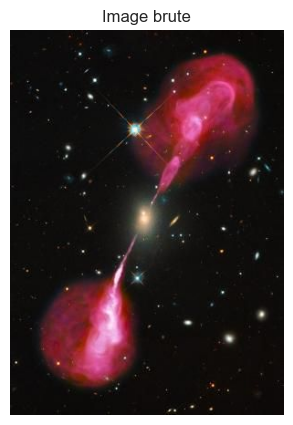

In [2]:
loaded_img = cv2.imread("images/hercule_galaxy.jpg")
loaded_img = cv2.cvtColor(loaded_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(loaded_img, cmap="gray")
plt.axis("off")
plt.title("Image brute")
plt.show()

## Emboss filter (filter de "gaufrage")

$$
  A_{\text{emboss}} =
  \left[ {\begin{array}{cc}
    0 & -1 & -1 \\
    1 & 0 & -1 \\
    1 & 1 & 0 \\
  \end{array} } \right]
$$


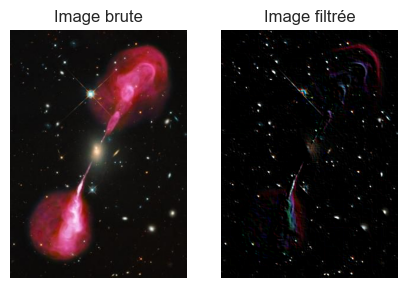

In [3]:
emboss_Kernel = np.array([[0,-1,-1],[1,0,-1],[1,1,0]])

emboss_Effect_Img = cv2.filter2D(src=loaded_img, kernel=emboss_Kernel,
                                 ddepth=-1)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(loaded_img,cmap="gray")
ax[0].axis("off")
ax[1].imshow(emboss_Effect_Img,cmap="gray")
ax[1].axis("off")
ax[0].set_title("Image brute")
ax[1].set_title("Image filtrée")
plt.show()

## Filtre d'affinage (Sharpening filter)

$$
  A_{\text{sharpening}} =
  \left[ {\begin{array}{cc}
    -1 & -1 & -1 \\
    -1 & 9 & -1 \\
    -1 & -1 & -1 \\
  \end{array} } \right]
$$

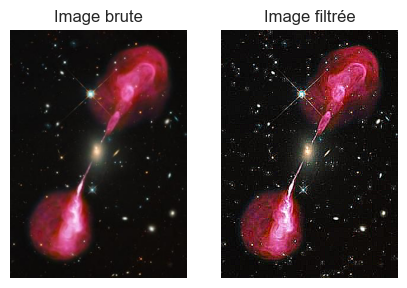

In [4]:
Sharpen_Kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
Sharpen_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Sharpen_Kernel, ddepth=-1)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(loaded_img,cmap="gray")
ax[0].axis("off")
ax[1].imshow(Sharpen_Effect_Img,cmap="gray")
ax[1].axis("off")
ax[0].set_title("Image brute")
ax[1].set_title("Image filtrée")
plt.show()

## Filtre Sobel 

Filtre pour détecter des bords.

On l'obtient en multipliant les filtres dérivés x et y obtenus ci-dessus par un filtre de lissage (1D) dans l'autre direction. Par exemple, un filtre 3×3 Sobel-x et Sobel-y peut être obtenu comme suit : 



### Dans la direction $x$

$$
  A_{\text{Sobel_x}} = \frac{1}{8}
  \left[ {\begin{array}{cc}
    -1 & 0 & 1 \\
    -2 & 0 & 2 \\
    -1 & 0 & 1 \\
  \end{array} } \right]
$$


### Dans la direction $y$

$$
  A_{\text{Sobel_y}} = \frac{1}{8}
  \left[ {\begin{array}{cc}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1 \\
  \end{array} } \right]
$$



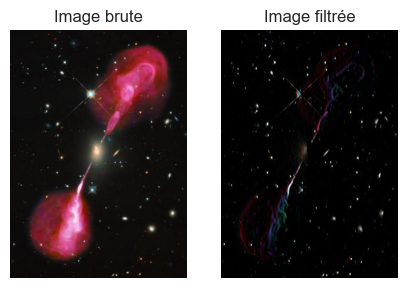

In [5]:
sobel_x_Kernel = 1/2*np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_Effect_Img = cv2.filter2D(src=loaded_img, kernel=sobel_x_Kernel, ddepth=-1)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(loaded_img,cmap="gray")
ax[0].axis("off")
ax[1].imshow(sobel_Effect_Img,cmap="gray")
ax[1].axis("off")
ax[0].set_title("Image brute")
ax[1].set_title("Image filtrée")
plt.show()

### Petite application avec un slider pour voir l'effet du filtre sur l'image.

In [6]:
from ipywidgets import interact, fixed, FloatSlider

def plot_sobel_filter(factor):
    if factor !=0 : 
        sobel_x_Kernel = 1/factor*np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        sobel_x_Kernel_img = cv2.filter2D(src=loaded_img, kernel=sobel_x_Kernel, ddepth=-1)
        fig, ax = plt.subplots(1,2, figsize=(5,5))
        ax[0].imshow(loaded_img,cmap="gray")
        ax[0].axis("off")
        ax[1].imshow(sobel_x_Kernel_img,cmap="gray")
        ax[1].axis("off")
        ax[0].set_title("Image brute")
        ax[1].set_title("Image filtrée")
        #plt.show()

interact(plot_sobel_filter, factor=FloatSlider(min=0.1, max=10, step=0.2), ax=fixed(None));

interactive(children=(FloatSlider(value=0.1, description='factor', max=10.0, min=0.1, step=0.2), Output()), _d…

## Blur filter

Exemple de filtre gaussien blur

$$
  A_{\text{gaussian blur}} = \frac{1}{16}
  \left[ {\begin{array}{cc}
    1 & 2 & 1 \\
    2 & 4 & 2 \\
    1 & 2 & 1 \\
  \end{array} } \right]
$$


In [7]:
def plot_gaussian_blur(factor):
    if factor !=0 : 
        g_blur_Kernel = 1/factor*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
        g_blur_Kernel_img = cv2.filter2D(src=loaded_img, kernel=g_blur_Kernel, ddepth=-1)
        fig, ax = plt.subplots(1,2, figsize=(5,5), facecolor='w')
        
        ax[0].imshow(loaded_img, cmap="gray")
        ax[0].axis("off")
        ax[1].imshow(g_blur_Kernel_img, cmap="gray")
        ax[1].axis("off")
        ax[0].set_title("Image brute")
        ax[1].set_title("Image filtrée")

interact(plot_gaussian_blur, factor=FloatSlider(min=1, max=50, step=1), ax=ax[1]);

interactive(children=(FloatSlider(value=1.0, description='factor', max=50.0, min=1.0, step=1.0), Output()), _d…

# Filtre Sépia

$$
  A_{\text{sharpening}} =
  \left[ {\begin{array}{cc}
    0.272 & 0.534 & 0.131 \\
    0.349 & 0.686 & 0.168 \\
    0.393 & 0.769 & 0.189 \\
  \end{array} } \right]
$$


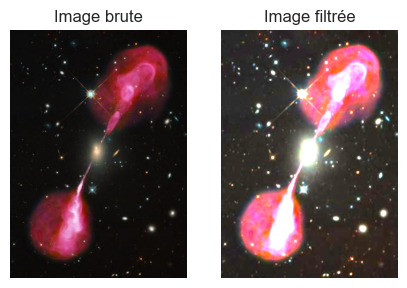

In [8]:
Sepia_Kernel = np.array([[0.272, 0.534, 0.131],[0.349, 0.686, 0.168],[0.393, 0.769, 0.189]])
Sepia_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Sepia_Kernel, ddepth=-1)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(loaded_img,cmap="gray")
ax[0].axis("off")
ax[1].imshow(Sepia_Effect_Img,cmap="gray")
ax[1].axis("off")
ax[0].set_title("Image brute")
ax[1].set_title("Image filtrée")
plt.show()